### Muhammad Kevin Alrahmanto (19/445592/PA/19416)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_excel('data_pet.xlsx')

In [3]:
df.head()

,C,V,F,S,ω,L,D,Q
0,10.0,26.0,12.0,0.428571,900,12,201.0,Bermanik
1,10.0,26.0,12.0,1.000000,900,12,209.0,Bermanik
2,10.0,26.0,12.0,2.333333,900,12,215.0,Bermanik
3,20.0,26.0,12.0,0.428571,900,12,496.0,Bermanik
4,20.0,26.0,12.0,1.000000,900,12,374.0,Bermanik


# 1. Eksplorasi Data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C,39.0,17.594872,7.035510,7.700000,12.0,15.0,22.250000,30.0
V,39.0,19.141026,6.951854,10.000000,14.0,15.5,26.000000,32.0
F,39.0,5.023410,6.453773,0.050000,0.5,1.2,11.000000,30.0
S,39.0,1.708181,1.197931,0.333333,1.0,1.0,2.333333,4.0
ω,39.0,416.410256,440.487094,0.000000,0.0,300.0,900.000000,2000.0
L,39.0,13.923077,2.659488,10.000000,12.0,15.0,15.000000,22.0
D,39.0,615.776410,495.320424,105.000000,230.0,496.0,734.500000,2000.0


Text(0.5, 1.0, 'Korelasi Pearson')

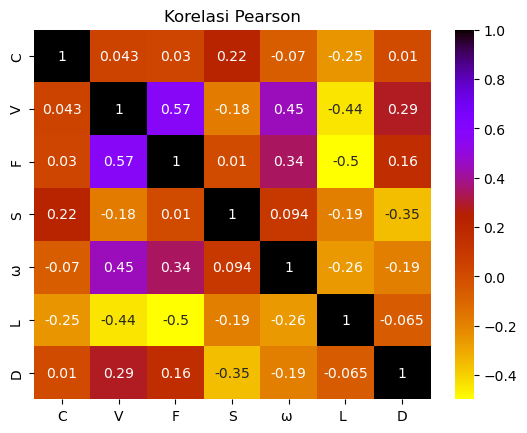

In [6]:
sns.heatmap(df.corr(method='pearson'), cmap='gnuplot_r', annot=True)
plt.title('Korelasi Pearson')

Text(0.5, 1.0, 'Korelasi Spearman')

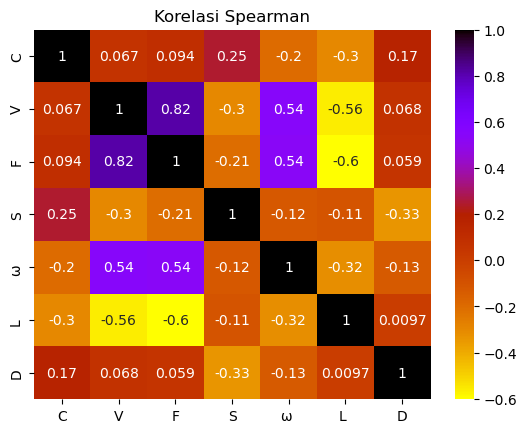

In [7]:
sns.heatmap(df.corr(method='spearman'), cmap='gnuplot_r', annot=True)
plt.title('Korelasi Spearman')

Text(0.5, 0.98, 'Pairplot')

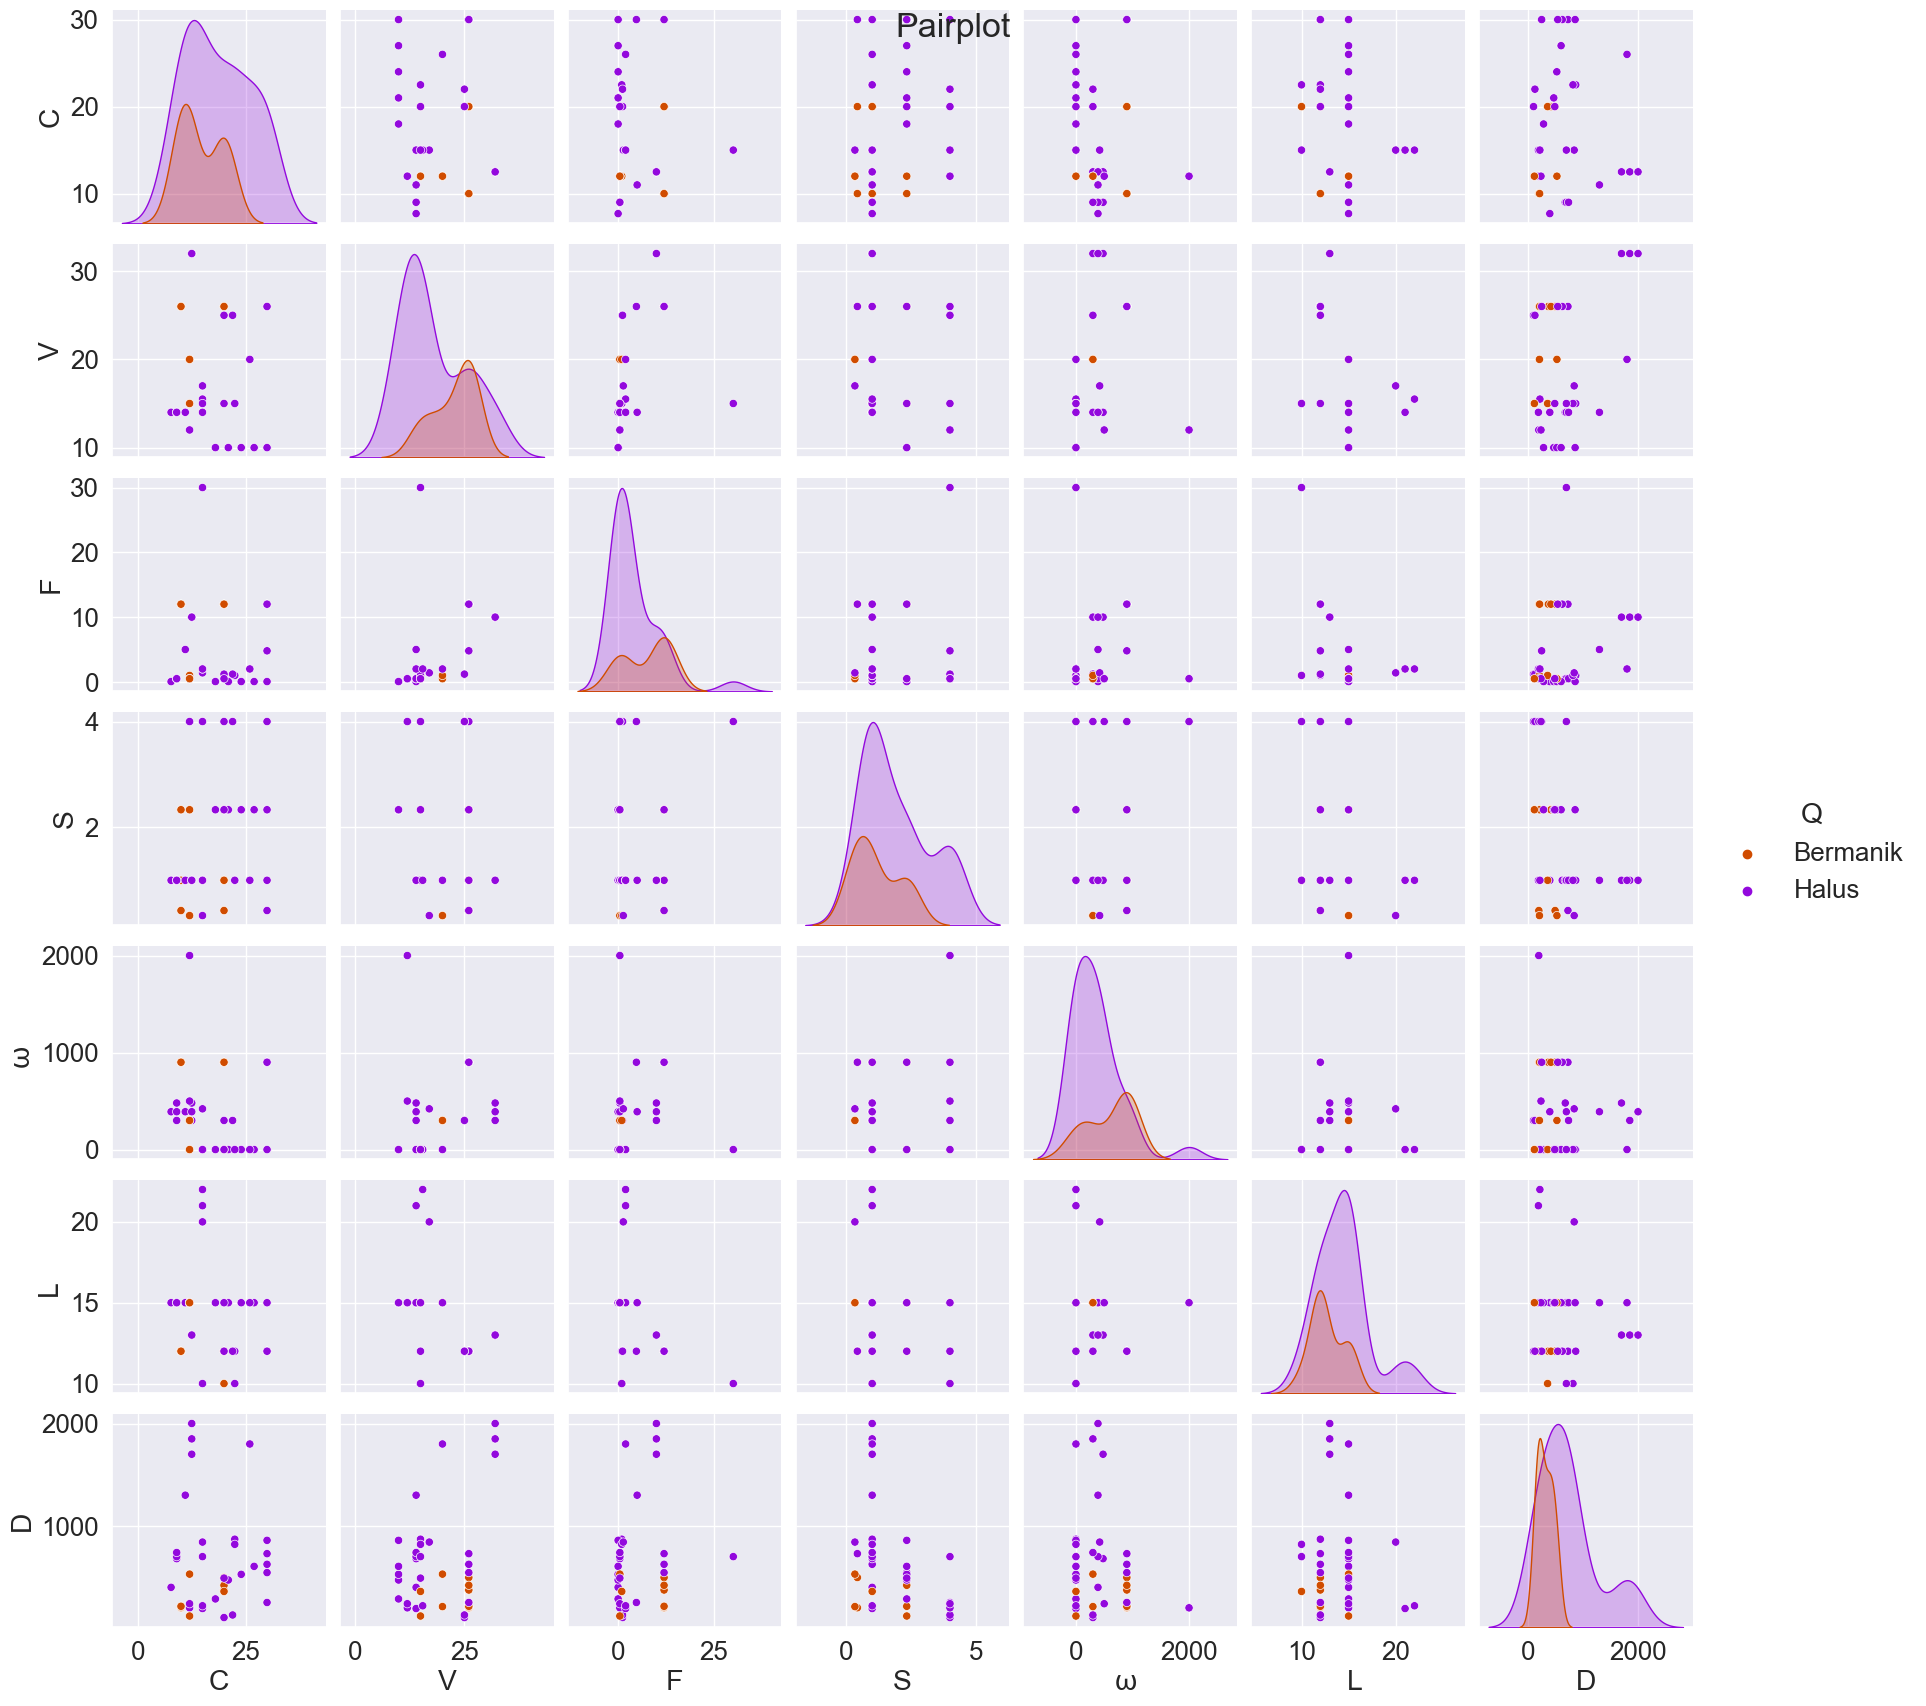

In [8]:
sns.set_style('darkgrid')
sns.set(font_scale=1.7)
rp =sns.pairplot(df, hue='Q', palette='gnuplot_r')
rp.fig.suptitle('Pairplot')

# 2. Transformasi Min-Max sebelum deteksi outlier

$$
x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler= MinMaxScaler()
origin_df=pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
origin_df.head()

,C,V,F,S,ω,L,D
0,0.103139,0.727273,0.398998,0.025974,0.45,0.166667,0.050660
1,0.103139,0.727273,0.398998,0.181818,0.45,0.166667,0.054881
2,0.103139,0.727273,0.398998,0.545455,0.45,0.166667,0.058047
3,0.551570,0.727273,0.398998,0.025974,0.45,0.166667,0.206332
4,0.551570,0.727273,0.398998,0.181818,0.45,0.166667,0.141953


Text(0.5, 1.0, 'Boxplot original data')

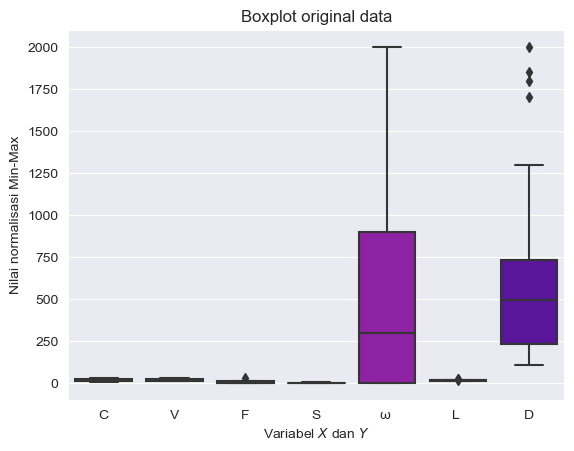

In [10]:
sns.set_style('darkgrid')
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:, :-1]), palette='gnuplot_r')
plt.xlabel('Variabel $X$ dan $Y$')
plt.ylabel('Nilai normalisasi Min-Max')
plt.title('Boxplot original data')

Text(0.5, 1.0, 'Boxplot untuk data yang sudah dinormalisasi')

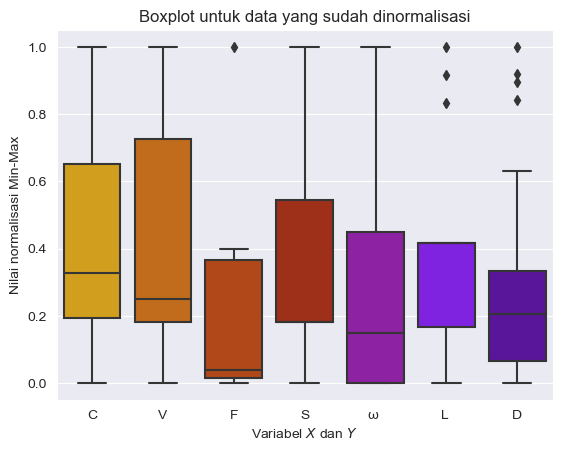

In [11]:
sns.set_style('darkgrid')
sns.boxplot(x="variable", y="value", data=pd.melt(origin_df), palette='gnuplot_r')
plt.xlabel('Variabel $X$ dan $Y$')
plt.ylabel('Nilai normalisasi Min-Max')
plt.title('Boxplot untuk data yang sudah dinormalisasi')

# 3. Regresi Linear Berganda

## 3.1 Deteksi Outlier 

In [12]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [13]:
def deteksi_outlier(data):
    scaler= MinMaxScaler()
    data_minmax=pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
    X = sm.add_constant(data_minmax.iloc[:, :-1])  
    Y = data_minmax.iloc[:,-1] 
    model= sm.OLS(Y, X).fit() 
    r_2=model.rsquared
    uji_beta=pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
    return r_2, uji_beta,sm.graphics.influence_plot(model, criterion="cooks")

(0.26901263055096514,
          coef  std err      t  P>|t|  [0.025  0.975]
 const  0.2922    0.160  1.822  0.078  -0.034   0.619
 C      0.0219    0.134  0.164  0.871  -0.250   0.294
 V      0.2815    0.174  1.620  0.115  -0.072   0.635
 F      0.1015    0.239  0.425  0.673  -0.385   0.588
 S     -0.2145    0.133 -1.608  0.118  -0.486   0.057
 ω     -0.4046    0.208 -1.947  0.060  -0.828   0.019
 L     -0.0049    0.225 -0.022  0.983  -0.462   0.453,
 <Figure size 640x480 with 1 Axes>)

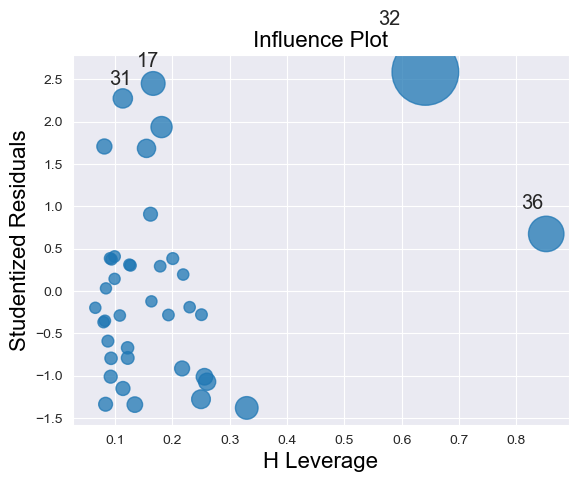

In [14]:
deteksi_outlier(df)

In [15]:
# 4 observasi dihapus
df.drop(df.index[[17,31,32,36]], inplace=True)

(0.26314116828979073,
          coef  std err      t  P>|t|  [0.025  0.975]
 const  0.3730    0.150  2.489  0.019   0.066   0.680
 C      0.0177    0.136  0.130  0.898  -0.262   0.297
 V      0.2205    0.226  0.974  0.338  -0.243   0.684
 F      0.1642    0.220  0.747  0.462  -0.286   0.615
 S     -0.2596    0.148 -1.760  0.089  -0.562   0.043
 ω     -0.3512    0.182 -1.930  0.064  -0.724   0.022
 L     -0.0901    0.206 -0.437  0.665  -0.512   0.332,
 <Figure size 640x480 with 1 Axes>)

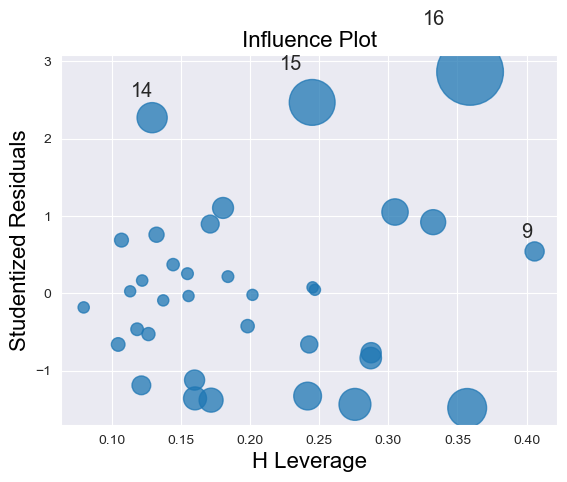

In [16]:
deteksi_outlier(df)

In [17]:
# 4 observasi dihapus, maka total observasi yang dihapus adalah 8 
df.drop(df.index[[9,14,15,16]], inplace=True)

(0.6925430144845262,
          coef  std err      t  P>|t|  [0.025  0.975]
 const  0.5652    0.149  3.800  0.001   0.258   0.872
 C      0.7210    0.142  5.078  0.000   0.428   1.014
 V     -0.5279    0.185 -2.847  0.009  -0.911  -0.145
 F     -0.6741    0.236 -2.851  0.009  -1.162  -0.186
 S     -0.6517    0.133 -4.914  0.000  -0.925  -0.378
 ω      0.8595    0.233  3.682  0.001   0.378   1.341
 L     -0.2297    0.184 -1.248  0.224  -0.610   0.150,
 <Figure size 640x480 with 1 Axes>)

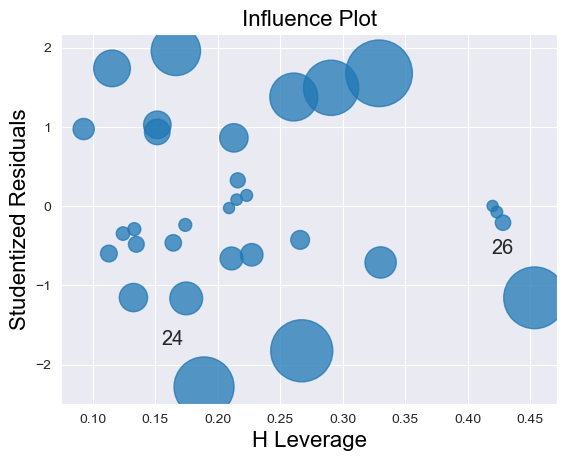

In [18]:
deteksi_outlier(df)

## 3.2 Analisis Regresi

In [19]:
scaler= MinMaxScaler()
df_final=pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_final

,C,V,F,S,ω,L,D
0,0.103139,1.00000,1.000000,0.025974,1.000000,0.166667,0.125490
1,0.103139,1.00000,1.000000,0.181818,1.000000,0.166667,0.135948
2,0.103139,1.00000,1.000000,0.545455,1.000000,0.166667,0.143791
3,0.551570,1.00000,1.000000,0.025974,1.000000,0.166667,0.511111
4,0.551570,1.00000,1.000000,0.181818,1.000000,0.166667,0.351634
5,0.551570,1.00000,1.000000,0.545455,1.000000,0.166667,0.411765
6,1.000000,1.00000,1.000000,0.025974,1.000000,0.166667,0.815686
7,1.000000,1.00000,1.000000,0.181818,1.000000,0.166667,0.679739
8,1.000000,1.00000,1.000000,0.545455,1.000000,0.166667,0.573856
9,0.000000,0.25000,0.000000,0.181818,0.433333,0.416667,0.385621


Text(0.5, 1.0, 'Boxplot untuk data normalisasi dan sudah lolos deteksi outlier')

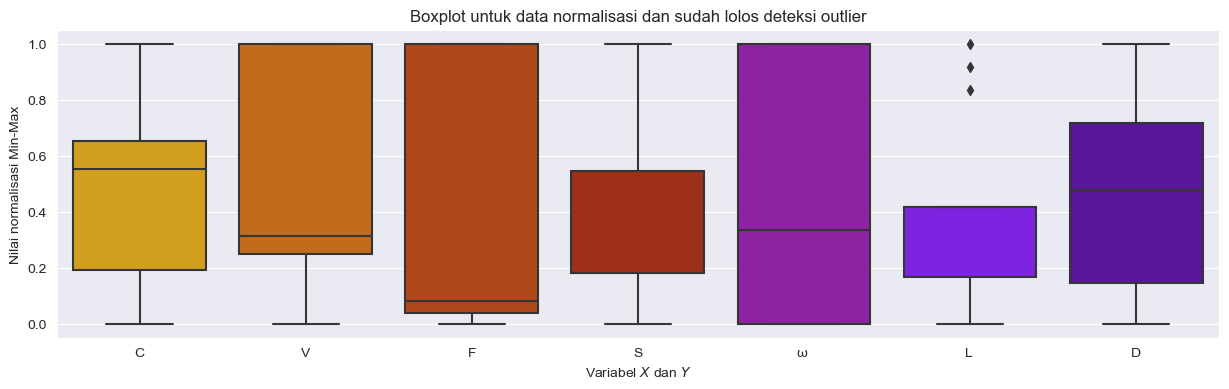

In [20]:
plt.rc("figure", figsize=(15,4))
sns.set_style('darkgrid')
sns.boxplot(x="variable", y="value", data=pd.melt(df_final), palette='gnuplot_r')
plt.xlabel('Variabel $X$ dan $Y$')
plt.ylabel('Nilai normalisasi Min-Max')
plt.title('Boxplot untuk data normalisasi dan sudah lolos deteksi outlier')

In [21]:
plt.style.use(['science', 'notebook','grid'])

In [22]:
X = sm.add_constant(df_final.iloc[:, :-1])  
Y = df_final.iloc[:,-1] 
model_1= sm.OLS(Y, X).fit() 

In [40]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     9.010
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.33e-05
Time:                        09:39:21   Log-Likelihood:                 10.469
No. Observations:                  31   AIC:                            -6.937
Df Residuals:                      24   BIC:                             3.101
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5652      0.149      3.800      0.001       0.258       0.872
C              0.7210      0.142      5.078      0.000       0.428       1.014
V             -0.5279      0.185     -2.847      0.009      -0.911      -0.145
F             -0.6741      0.236     -2.851      0.009      -1.162      -0.186
S             -0.6517      0.133     -4.914      0.000      -0.925      -0.378
ω              0.8595      0.233      3.682      0.001       0.378       1.341
L             -0.2297      0.184     -1.248      0.224      -0.610       0.150
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.355
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.522
Skew:                           0.144   Prob(JB):                        0.770
Kurtosis:                       2.433   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


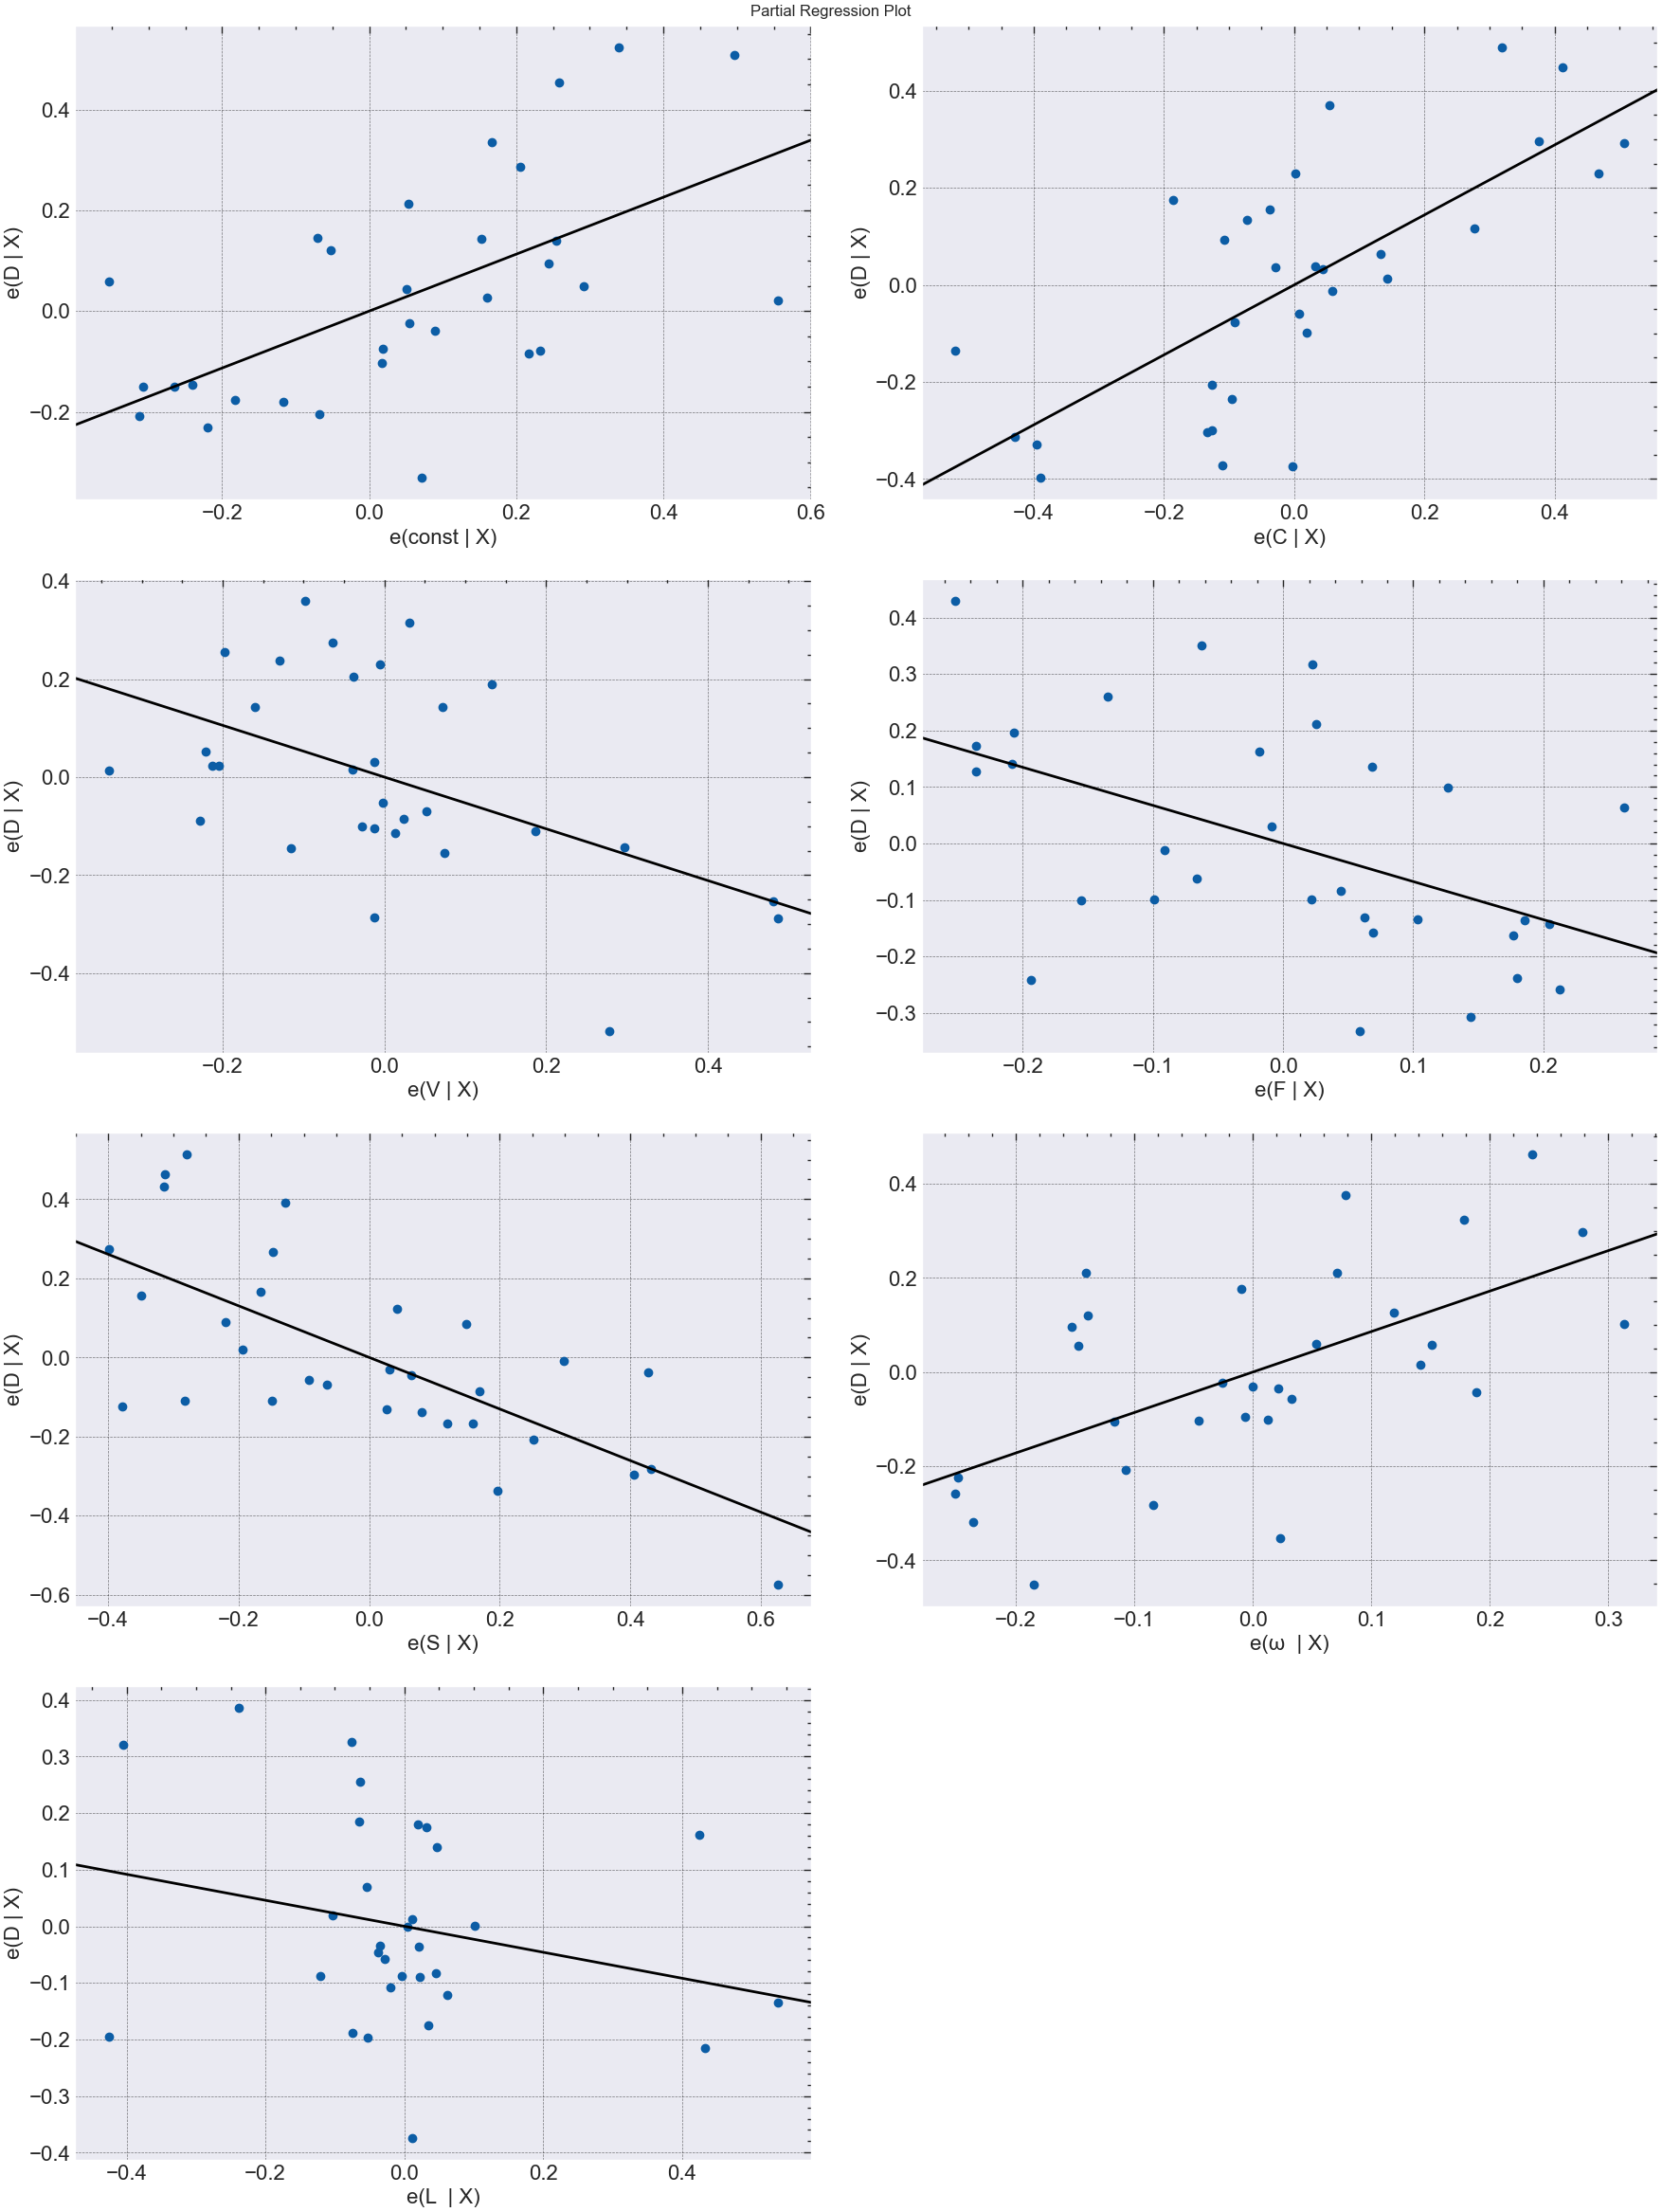

In [41]:
plt.rc("figure", figsize=(18,24))
fig = sm.graphics.plot_partregress_grid(model_1)
fig.tight_layout(pad=2.0)

In [42]:
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [43]:
plt.style.use(['science', 'notebook','grid'])

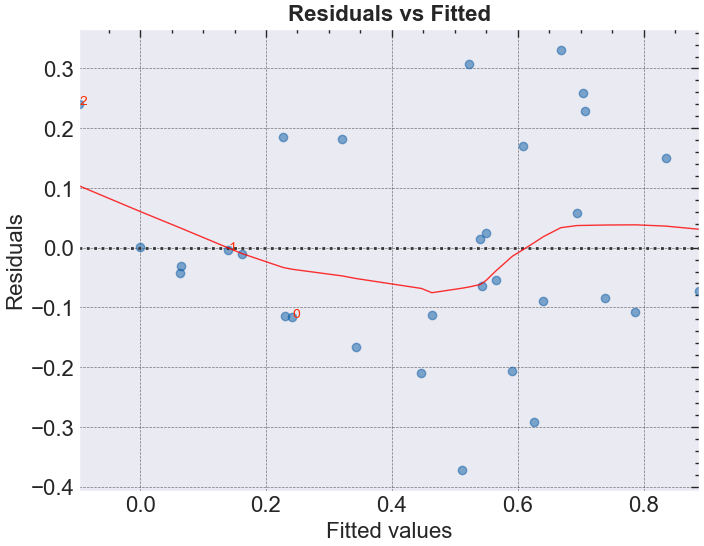

In [44]:
cls_1 = Linear_Reg_Diagnostic(model_1)
cls_1.residual_plot();

# Interaction Term

In [45]:
df=pd.read_excel('data_pet.xlsx')

In [46]:
X_pre_ia= df.iloc[:, :-2] 
Y_ia = df.iloc[:,-2] 

In [47]:
X_pre_ia

,C,V,F,S,ω,L
0,10.0,26.0,12.0000,0.428571,900,12
1,10.0,26.0,12.0000,1.000000,900,12
2,10.0,26.0,12.0000,2.333333,900,12
3,20.0,26.0,12.0000,0.428571,900,12
4,20.0,26.0,12.0000,1.000000,900,12
5,20.0,26.0,12.0000,2.333333,900,12
6,30.0,26.0,12.0000,0.428571,900,12
7,30.0,26.0,12.0000,1.000000,900,12
8,30.0,26.0,12.0000,2.333333,900,12
9,30.0,26.0,4.8000,4.000000,900,12


In [48]:
Y_ia

0      201.00
1      209.00
2      215.00
3      496.00
4      374.00
5      420.00
6      729.00
7      625.00
8      544.00
9      252.00
10     400.00
11     680.00
12     700.00
13     740.00
14    1300.00
15    1700.00
16    1850.00
17    2000.00
18     870.00
19     286.83
20     471.58
21     526.99
22     604.91
23     858.97
24     360.00
25     820.00
26     105.00
27     130.00
28     529.00
29     212.00
30     842.00
31    1800.00
32     200.00
33     240.00
34     193.00
35     220.00
36     700.00
37     120.00
38     490.00
Name: D, dtype: float64

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_post_ia=poly.fit_transform(X_pre_ia)
poly.get_feature_names_out()

array(['1', 'C', 'V', 'F', 'S', 'ω ', 'L ', 'C V', 'C F', 'C S', 'C ω ',
       'C L ', 'V F', 'V S', 'V ω ', 'V L ', 'F S', 'F ω ', 'F L ',
       'S ω ', 'S L ', 'ω  L '], dtype=object)

In [50]:
X_ia_df=pd.DataFrame(X_post_ia, columns=poly.get_feature_names_out())
X_ia_df.rename({'1':'const'}, axis=1, inplace=True)
X_ia_df

,const,C,V,F,S,ω,L,C V,C F,C S,...,V F,V S,V ω,V L,F S,F ω,F L,S ω,S L,ω L
0,1.0,10.0,26.0,12.0000,0.428571,900.0,12.0,260.0,120.0000,4.285714,...,312.000,11.142857,23400.0,312.0,5.142857,10800.0,144.000,385.714286,5.142857,10800.0
1,1.0,10.0,26.0,12.0000,1.000000,900.0,12.0,260.0,120.0000,10.000000,...,312.000,26.000000,23400.0,312.0,12.000000,10800.0,144.000,900.000000,12.000000,10800.0
2,1.0,10.0,26.0,12.0000,2.333333,900.0,12.0,260.0,120.0000,23.333333,...,312.000,60.666667,23400.0,312.0,28.000000,10800.0,144.000,2100.000000,28.000000,10800.0
3,1.0,20.0,26.0,12.0000,0.428571,900.0,12.0,520.0,240.0000,8.571429,...,312.000,11.142857,23400.0,312.0,5.142857,10800.0,144.000,385.714286,5.142857,10800.0
4,1.0,20.0,26.0,12.0000,1.000000,900.0,12.0,520.0,240.0000,20.000000,...,312.000,26.000000,23400.0,312.0,12.000000,10800.0,144.000,900.000000,12.000000,10800.0
5,1.0,20.0,26.0,12.0000,2.333333,900.0,12.0,520.0,240.0000,46.666667,...,312.000,60.666667,23400.0,312.0,28.000000,10800.0,144.000,2100.000000,28.000000,10800.0
6,1.0,30.0,26.0,12.0000,0.428571,900.0,12.0,780.0,360.0000,12.857143,...,312.000,11.142857,23400.0,312.0,5.142857,10800.0,144.000,385.714286,5.142857,10800.0
7,1.0,30.0,26.0,12.0000,1.000000,900.0,12.0,780.0,360.0000,30.000000,...,312.000,26.000000,23400.0,312.0,12.000000,10800.0,144.000,900.000000,12.000000,10800.0
8,1.0,30.0,26.0,12.0000,2.333333,900.0,12.0,780.0,360.0000,70.000000,...,312.000,60.666667,23400.0,312.0,28.000000,10800.0,144.000,2100.000000,28.000000,10800.0
9,1.0,30.0,26.0,4.8000,4.000000,900.0,12.0,780.0,144.0000,120.000000,...,124.800,104.000000,23400.0,312.0,19.200000,4320.0,57.600,3600.000000,48.000000,10800.0


In [51]:
model_iaterm= sm.OLS(Y_ia, X_ia_df).fit() 
model_iaterm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     14.99
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.27e-07
Time:                        09:39:56   Log-Likelihood:                -238.90
No. Observations:                  39   AIC:                             521.8
Df Residuals:                      17   BIC:                             558.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.113e+04   5891.256      1.890      0.076   -1295.459    2.36e+04
C           -332.8159    134.903     -2.467      0.025    -617.437     -48.195
V           -255.1903    367.053     -0.695      0.496   -1029.604     519.223
F          -1042.6783    267.254     -3.901      0.001   -1606.536    -478.821
S          -1664.2830   1976.398     -0.842      0.411   -5834.119    2505.553
ω              1.9975      5.086      0.393      0.699      -8.732      12.728
L           -659.7566    378.187     -1.745      0.099   -1457.661     138.147
C V            8.7314      2.824      3.092      0.007       2.773      14.690
C F           -8.5183      7.805     -1.091      0.290     -24.986       7.949
C S           -7.0910      8.211     -0.864      0.400     -24.414      10.232
C ω           -0.0011      0.076     -0.014      0.989      -0.161       0.159
C L           19.9080      8.889      2.240      0.039       1.153      38.663
V F           14.7844      5.630      2.626      0.018       2.905      26.663
V S           11.5066     27.205      0.423      0.678     -45.892      68.905
V ω           -0.0552      0.138     -0.399      0.695      -0.347       0.237
V L            5.5117     24.470      0.225      0.824     -46.115      57.138
F S           73.7704     36.936      1.997      0.062      -4.157     151.698
F ω           -0.2279      0.105     -2.178      0.044      -0.449      -0.007
F L           69.6842     17.084      4.079      0.001      33.641     105.727
S ω           -0.7857      0.289     -2.723      0.014      -1.395      -0.177
S L          107.5691    116.790      0.921      0.370    -138.835     353.974
ω  L           0.1290      0.266      0.485      0.634      -0.432       0.690
==============================================================================
Omnibus:                        5.447   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.844
Skew:                          -0.287   Prob(JB):                       0.0538
Kurtosis:                       4.807   Cond. No.                     4.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

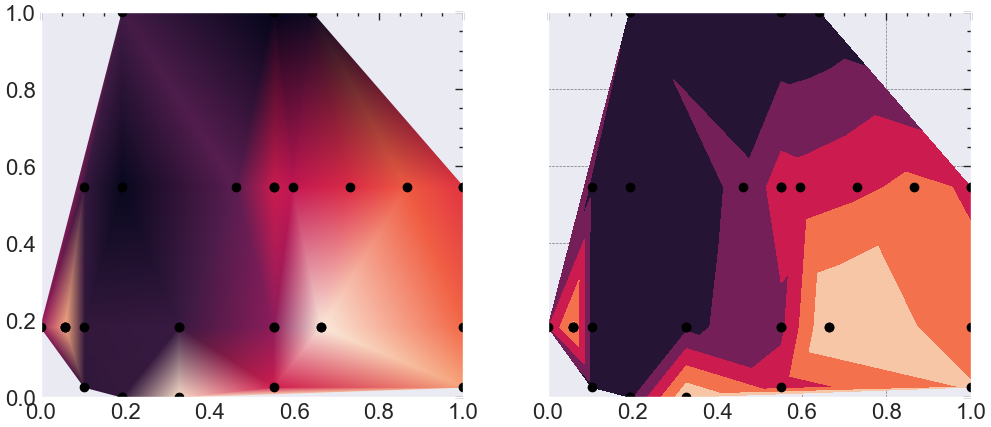

In [52]:
x = df_final['C']
y = df_final['S']
z = df_final['D']
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
ax[0].tripcolor(x,y,z, shading='gouraud', )
ax[1].tricontourf(x,y,z, 5) # choose 20 contour levels, just to show how good its interpolation is
ax[1].plot(x,y, 'ko ')
ax[0].plot(x,y, 'ko ')
plt.show()

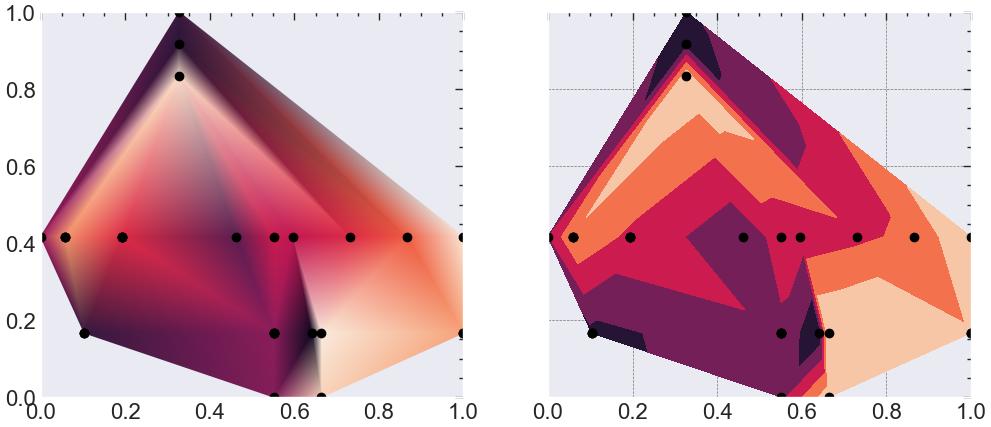

In [53]:
x = df_final['C']
y = df_final['L ']
z = df_final['D']
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
ax[0].tripcolor(x,y,z, shading='gouraud', )
ax[1].tricontourf(x,y,z, 5) # choose 20 contour levels, just to show how good its interpolation is
ax[1].plot(x,y, 'ko ')
ax[0].plot(x,y, 'ko ')
plt.show()

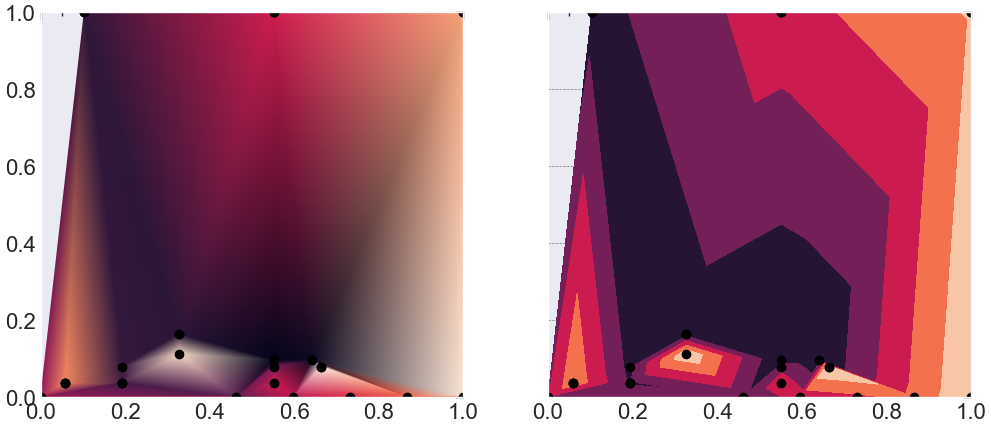

In [54]:
x = df_final['C']
y = df_final['F']
z = df_final['D']
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
ax[0].tripcolor(x,y,z, shading='gouraud', )
ax[1].tricontourf(x,y,z, 5) # choose 20 contour levels, just to show how good its interpolation is
ax[1].plot(x,y, 'ko ')
ax[0].plot(x,y, 'ko ')
plt.show()

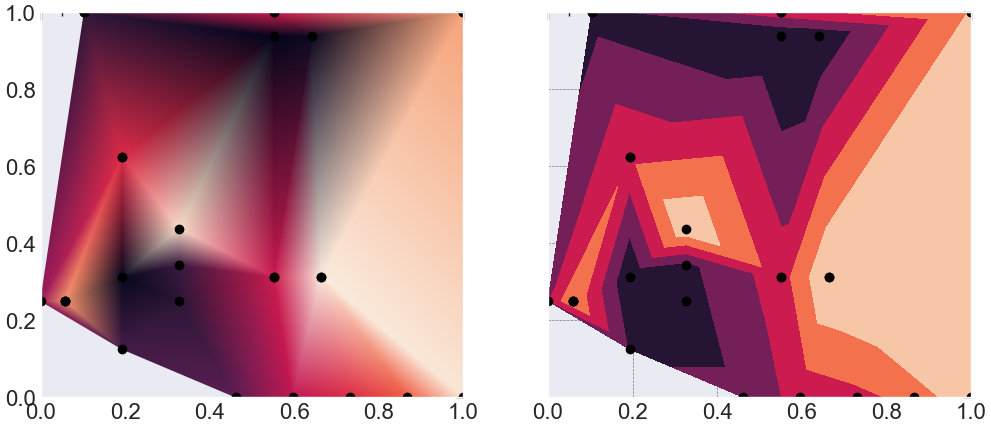

In [55]:
x = df_final['C']
y = df_final['V']
z = df_final['D']
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
ax[0].tripcolor(x,y,z, shading='gouraud', )
ax[1].tricontourf(x,y,z, 5) # choose 20 contour levels, just to show how good its interpolation is
ax[1].plot(x,y, 'ko ')
ax[0].plot(x,y, 'ko ')
plt.show()

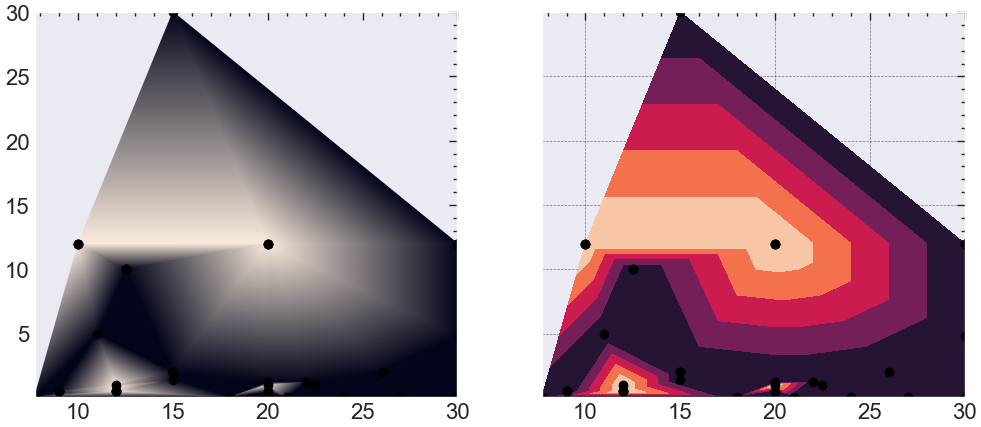

In [56]:
x = df['C']
y = df['F']
z =pd.get_dummies(df['Q']).iloc[:, 0]
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
ax[0].tripcolor(x,y,z, shading='gouraud', )
ax[1].tricontourf(x,y,z, 5) # choose 20 contour levels, just to show how good its interpolation is
ax[1].plot(x,y, 'ko ')
ax[0].plot(x,y, 'ko ')